In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [119]:
df=pd.read_csv("titanic.csv")

In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
avg_age=df.loc[df["Age"]!=np.nan,"Age"].mean()
df.loc[df["Age"].isna(),"Age"]=avg_age

In [123]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [141]:
df.loc[df['Embarked'].isna(),'Embarked']=df['Embarked'].mode()[0]

In [142]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [146]:
df=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [148]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [149]:
df_num=df[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]

In [150]:
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


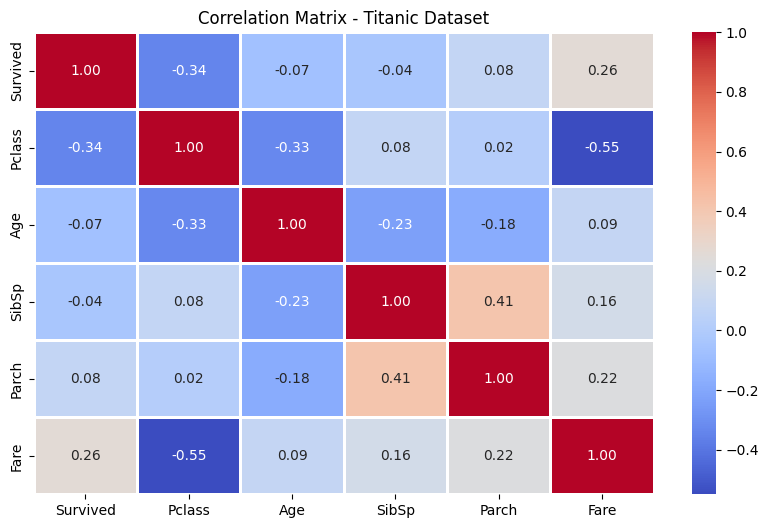

In [155]:
plt.figure(figsize=(10,6))
corr_matrix=df_num.corr()
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=1.0)
plt.title("Correlation Matrix - Titanic Dataset")
plt.show()

In [156]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [158]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
model=LogisticRegression(max_iter=1000)

In [161]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [162]:
y_pred=model.predict(X_test)

In [163]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8100558659217877

In [164]:
print(f"Accuracy of the model is: {round(accuracy,2)*100} %")

Accuracy of the model is: 81.0 %


In [166]:
cm=confusion_matrix(y_test,y_pred)

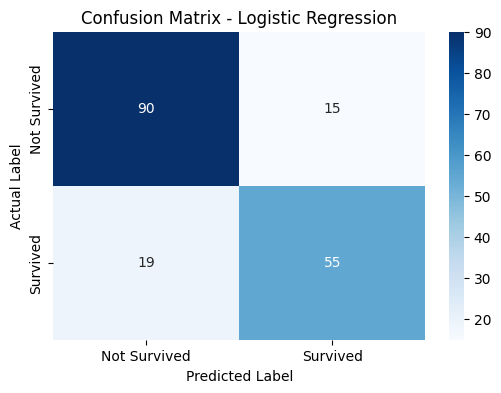

In [169]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=["Not Survived","Survived"],
            yticklabels=["Not Survived","Survived"]
           )
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [170]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [173]:
print(67+11+14+42)

134


In [175]:
cm

array([[90, 15],
       [19, 55]])